In [15]:
import os
import re
import matplotlib.pyplot as plt
from collections import Counter

PRE-PROCESSING


In [16]:
def preprocess_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Loại bỏ các ký tự không cần thiết như dấu cách, dấu chấm, dấu phẩy, v.v.
    text = re.sub(r'[^\w\s]', '', text)

    # Chia văn bản thành các từ
    words = re.findall(r'\b\w+\b', text)

    return words

def process_files_in_directory(directory_path):
    all_words = []

    for filename in os.listdir(directory_path):
        if filename.endswith(".txt"):
            file_path = os.path.join(directory_path, filename)
            words = preprocess_text(file_path)
            all_words.extend(words)

    return all_words

directory_path = 'D:\SP24\DPL\MedicalReportsVN'
all_words = process_files_in_directory(directory_path)


VISUALIZE

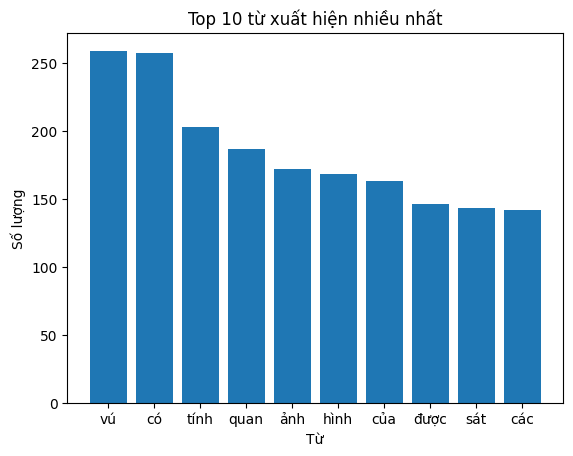

In [18]:

# Đếm số lần xuất hiện của từng từ
word_counts = Counter(all_words)

# Lấy top 10 từ xuất hiện nhiều nhất
top_words = word_counts.most_common(10)

# Tạo biểu đồ
words, counts = zip(*top_words)
plt.bar(words, counts)
plt.xlabel('Từ')
plt.ylabel('Số lượng')
plt.title('Top 10 từ xuất hiện nhiều nhất')
plt.show()


In [19]:
def visualize_specific_words(directory_path, specific_words):
    all_words = process_files_in_directory(directory_path)

    # Đếm số lần xuất hiện của từng từ
    word_counts = Counter(all_words)

    # Lấy số lần xuất hiện của các từ quan trọng
    specific_word_counts = {word: word_counts[word] for word in specific_words}

    # Tạo biểu đồ
    words, counts = zip(*specific_word_counts.items())
    plt.bar(words, counts)
    plt.xlabel('Từ')
    plt.ylabel('Số lượng')
    plt.title('Số lượng xuất hiện của các từ quan trọng')
    plt.show()

In [20]:
import wordcloud
from wordcloud import WordCloud

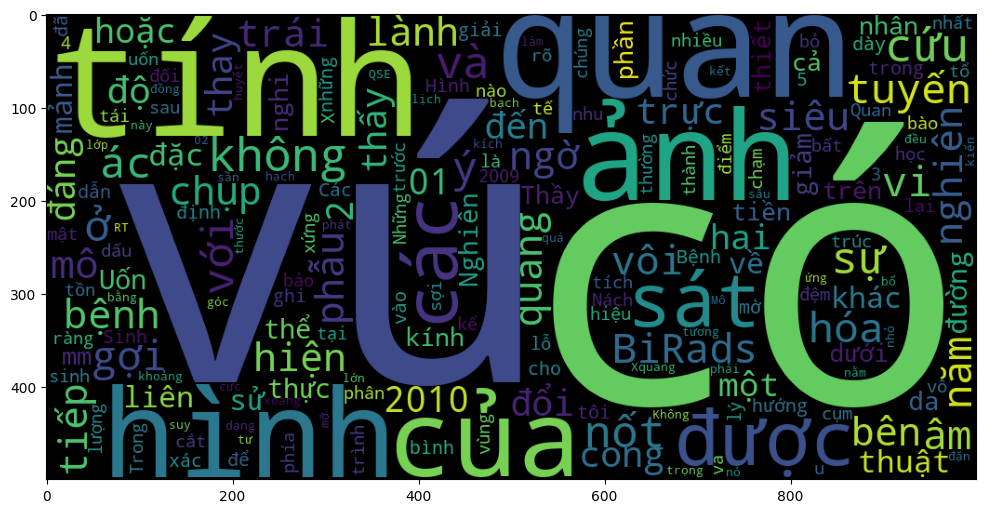

In [21]:

wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_counts)
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)